**IMPORT THE NECESSARY LIBRARIES**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization, Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop, SGD

**EXTRACT THE DATA**

In [ ]:
import os

# Assuming the correct path to the dataset is '/kaggle/input/utkface-new'
dataset_path = '/content/drive/MyDrive/dl/UTKFace'

# List the files in the directory
files = os.listdir(dataset_path)

print(files)

['25_1_1_20170116001414790.jpg.chip.jpg', '25_1_1_20170112231543709.jpg.chip.jpg', '25_1_1_20170112224716002.jpg.chip.jpg', '25_1_1_20170114030227321.jpg.chip.jpg', '25_1_1_20170114030910094.jpg.chip.jpg', '25_1_1_20170116003155558.jpg.chip.jpg', '25_1_1_20170116003216605.jpg.chip.jpg', '25_1_1_20170116003230778.jpg.chip.jpg', '25_1_1_20170112205151018.jpg.chip.jpg', '25_1_1_20170112215304176.jpg.chip.jpg', '25_1_1_20170113011522470.jpg.chip.jpg', '25_1_1_20170112205156233.jpg.chip.jpg', '25_1_1_20170113001625270.jpg.chip.jpg', '25_1_1_20170116001314901.jpg.chip.jpg', '25_1_1_20170112230535427.jpg.chip.jpg', '25_1_1_20170112235005249.jpg.chip.jpg', '25_1_1_20170113183706142.jpg.chip.jpg', '25_1_1_20170116175304948.jpg.chip.jpg', '25_1_1_20170117192036085.jpg.chip.jpg', '25_1_1_20170117140352370.jpg.chip.jpg', '25_1_1_20170117151909157.jpg.chip.jpg', '25_1_1_20170116003425155.jpg.chip.jpg', '25_1_1_20170117171908418.jpg.chip.jpg', '25_1_2_20170104020239939.jpg.chip.jpg', '25_1_2_2017010

*Creating list of IMAGES, AGE, GENDER from the dataset*

In [ ]:
ages=[]
genders=[]
images=[]

for fl in files:
  if fl.endswith('.jpg') and '_' in fl:
    age = int(fl.split('_')[0])
    gender = int(fl.split('_')[1])
    total = dataset_path + '/' + fl
    print(total)
    image = cv2.imread(total)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)
    ages.append(age)
    genders.append(gender)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/dl/UTKFace/24_1_4_20170103223954911.jpg.chip.jpg
/content/drive/MyDrive/dl/UTKFace/24_1_4_20161223231327524.jpg.chip.jpg
/content/drive/MyDrive/dl/UTKFace/24_1_4_20170103223935080.jpg.chip.jpg
/content/drive/MyDrive/dl/UTKFace/24_1_4_20170105183531601.jpg.chip.jpg
/content/drive/MyDrive/dl/UTKFace/24_1_4_20170103224843361.jpg.chip.jpg
/content/drive/MyDrive/dl/UTKFace/24_1_4_20170103224705429.jpg.chip.jpg
/content/drive/MyDrive/dl/UTKFace/24_1_4_20170103223710519.jpg.chip.jpg
/content/drive/MyDrive/dl/UTKFace/24_1_4_20170103223727135.jpg.chip.jpg
/content/drive/MyDrive/dl/UTKFace/24_1_3_20170119171104024.jpg.chip.jpg
/content/drive/MyDrive/dl/UTKFace/24_1_3_20170119171101656.jpg.chip.jpg
/content/drive/MyDrive/dl/UTKFace/24_1_4_20170103233659572.jpg.chip.jpg
/content/drive/MyDrive/dl/UTKFace/24_1_3_20170119171109382.jpg.chip.jpg
/content/drive/MyDrive/dl/UTKFace/24_1_4_20170102233433610.jpg.chip.jpg
/content/driv

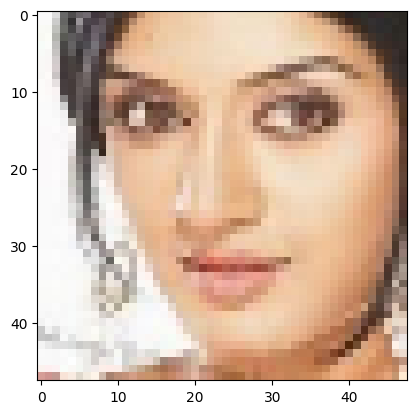

In [ ]:
plt.imshow(images[125])

In [ ]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [ ]:
np.save('/content/drive/MyDrive/dl/UTKFace/working/image.npy',images_f)
np.save('/content/drive/MyDrive/dl/UTKFace/working/age.npy',ages_f)
np.save('/content/drive/MyDrive/dl/UTKFace/working/gender.npy',genders_f)

In [ ]:
np.unique(genders_f,return_counts=True)

(array([0, 1]), array([3127, 3355]))

In [ ]:
values, count=np.unique(ages_f,return_counts=True)
print(count)

[1123  156   68  137   81  157  177  247  158  262   98  284  356  395
  426  859  734  732   11    2    1    5    5    1    3    4]


In [ ]:
count = count.tolist()

*Plotting the samples Agewise*

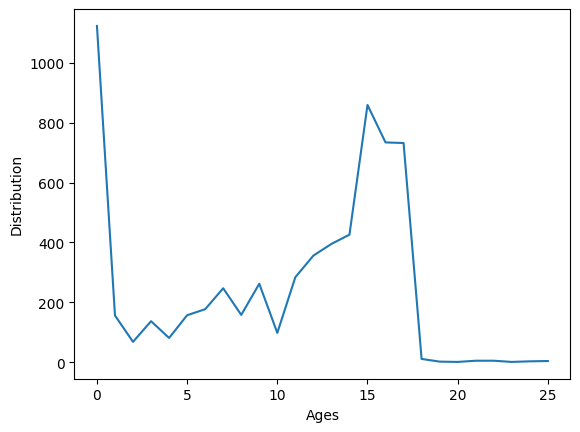

In [ ]:
plt.plot(count)
plt.xlabel("Ages")
plt.ylabel('Distribution')
plt.show()

*Define lables for output*

In [ ]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [ ]:
images_f_2=images_f/255
images_f_2.shape

(6482, 48, 48, 3)

In [ ]:
labels_f=np.array(labels)

**SPLITTING THE DATASET INTO TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [ ]:
Y_train[0:2]

array([[17,  0],
       [12,  1]])

In [ ]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [ ]:
Y_train_2[0][0:5]

array([0, 1, 0, 1, 1])

In [ ]:
Y_train_2[1][0:5]

array([17, 12, 25, 20,  1])

**DEFINING THE MODEL**

In [ ]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [ ]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer='rmsprop',metrics=["accuracy",'mse'])
    return model

In [ ]:
model_ag=model((48,48,3))

In [ ]:
model_ag.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 48, 48, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 48, 48, 32)     │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 48, 48, 32)     │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 48, 48, 32)     │              0 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 24, 24, 32)     │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 24, 24, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 24, 24, 64)     │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 24, 24, 64)     │              0 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 12, 12, 64)     │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 12, 12, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 12, 12, 128)    │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 12, 12, 128)    │              0 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 6, 6, 128)      │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 6, 6, 256)      │        295,168 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 6, 6, 256)      │              0 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 6, 6, 256)      │              0 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 3, 3, 256)      │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)    

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

**INITIALIZING THE MODEL**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
fle_s='Age_Sex_Detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_sex_out_accuracy',verbose=1,save_best_only=True,save_weights_only=False, mode="max",save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=50,monitor='val_sex_out_accuracy',restore_best_weights='True',mode='max')
callback_list=[checkpoint,Early_stop]

In [ ]:
history_ag=model_ag.fit(X_train,Y_train_2,batch_size=128,validation_data=(X_test,Y_test_2),epochs=60, callbacks=callback_list)

Epoch 1/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - age_out_mse: 278.7177 - loss: 14.5372 - sex_out_accuracy: 0.5191
Epoch 1: val_sex_out_accuracy improved from -inf to 0.52005, saving model to Age_Sex_Detection.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - age_out_mse: 277.0228 - loss: 14.4745 - sex_out_accuracy: 0.5194 - val_age_out_mse: 210.8877 - val_loss: 13.5882 - val_sex_out_accuracy: 0.5200
Epoch 2/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - age_out_mse: 165.7265 - loss: 10.2331 - sex_out_accuracy: 0.5088
Epoch 2: val_sex_out_accuracy did not improve from 0.52005
38/38 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - age_out_mse: 165.7297 - loss: 10.2327 - sex_out_accuracy: 0.5090 - val_age_out_mse: 120.1579 - val_loss: 9.4126 - val_sex_out_accuracy: 0.5157
Epoch 3/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - age_out_mse: 130.3245 - loss: 9.3655 - sex_out_accuracy: 0.5312
Epoch 3: val_sex_out_accuracy improved from 0.52005 to 0.53054, saving model to Age_Sex_Detection.keras
38/38 ━━━━━━━━━━━━━━

In [ ]:
model_ag.evaluate(X_test,Y_test_2)

51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - age_out_mse: 45.4905 - loss: 5.0813 - sex_out_accuracy: 0.7954


[5.1777191162109375, 57.238861083984375, 0.8285009264945984]

In [ ]:
pred=model_ag.predict(X_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step


In [ ]:
pred[1]

array([[17.793108 ],
       [15.119994 ],
       [16.181519 ],
       ...,
       [ 6.7204494],
       [17.265171 ],
       [15.571867 ]], dtype=float32)

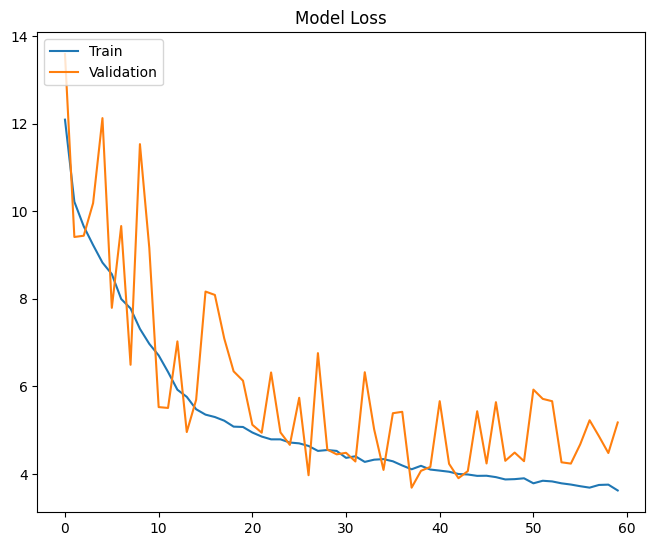

In [ ]:
plt.plot(history_ag.history['loss'])
plt.plot(history_ag.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

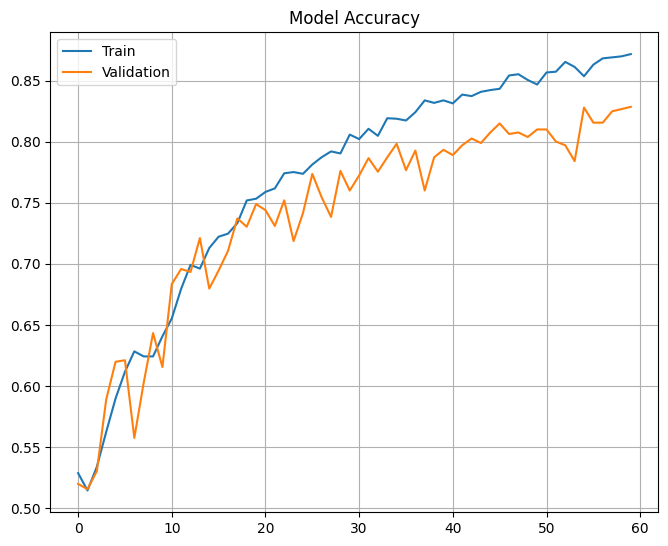

In [ ]:
plt.plot(history_ag.history['sex_out_accuracy'])
plt.plot(history_ag.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)
plt.grid()

*Marking Rport of the model (Gender only)*

In [ ]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

<ipython-input-34-3496039aa258>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
report=classification_report(Y_test_2[0],Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       804
           1       0.84      0.83      0.84       817

    accuracy                           0.84      1621
   macro avg       0.84      0.84      0.84      1621
weighted avg       0.84      0.84      0.84      1621



In [ ]:
results=confusion_matrix(Y_test_2[0],Pred_l)

In [ ]:
print(results)

[[675 110]
 [168 668]]


**TESTING SOME SAMPLE IMAGES**

In [ ]:
def test_image(ind,images_f,images_f_2,model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

In [ ]:
def test_image(ind,images_f,images_f_2,model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Age is 17
Predicted Gender is Female


<ipython-input-39-ba33c4061930>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
<ipython-input-39-ba33c4061930>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


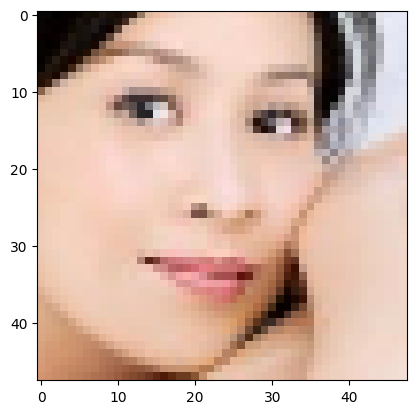

In [ ]:
test_image(45,images_f,images_f_2,model_ag)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Age is 17
Predicted Gender is Female


<ipython-input-39-ba33c4061930>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
<ipython-input-39-ba33c4061930>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


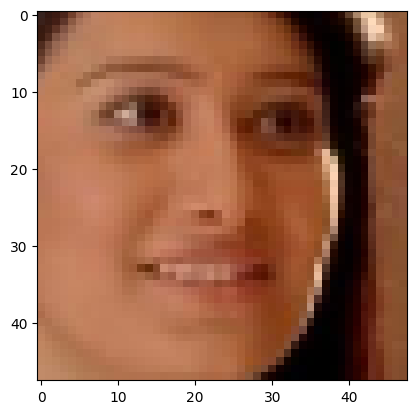

In [ ]:
test_image(123,images_f,images_f_2,model_ag)